In [205]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        'print(os.path.join(dirname, filename))'

# Any results you write to the current directory are saved as output.

In [206]:
data_dir = "../input/heart-sounds-physionet-challange-2016/training/training-a/"
from pathlib import Path

pathlist = Path(data_dir).glob('**/*.asm')
for path in pathlist:
     # because path is object not string
     path_in_str = str(path)
print(data_dir)

../input/heart-sounds-physionet-challange-2016/training/training-a/


In [207]:
print(os.listdir('../input/heart-sounds-physionet-challange-2016/training'))


['training-f', 'training-c', 'training-d', 'training-a', 'training-e', 'training-b']


# Installing the libary 

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, auc, roc_auc_score, precision_recall_curve, accuracy_score

from IPython.display import Audio
from scipy.io import wavfile
from glob import glob

#Note : LibROSA is a python package for music and audio analysis. 
import librosa
import librosa.display

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, auc, roc_auc_score, precision_recall_curve, accuracy_score

from IPython.display import Audio
from scipy.io import wavfile
from glob import glob

#Note : LibROSA is a python package for music and audio analysis. 
import librosa
import librosa.display



In [209]:
# https://www.newbedev.com/python/howto/how-to-iterate-over-files-in-a-given-directory/

### Load the data

In [210]:
def load_wave_file(path):
    wav, sr = librosa.load(path)
    return wav, sr


In [211]:
wav_path = '../input/heart-sounds-physionet-challange-2016/training/'
wav, sr = load_wave_file(wav_path+'training-a/a0409.wav')
wav2, sr2 = load_wave_file(wav_path+'training-a/a0408.wav')

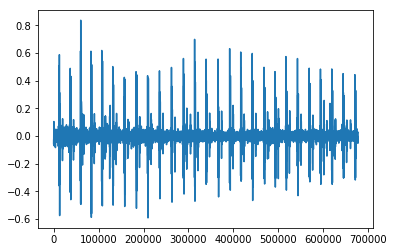

In [212]:
wav, sr = load_wave_file(wav_path+'training-a/a0409.wav')
plt.plot(wav)

In [213]:
import IPython.display as ipd
wav, sr = load_wave_file(wav_path+'training-a/a0409.wav')
ipd.Audio(wav,rate=sr)

In [216]:
data_dir = "../input/heart-sounds-physionet-challange-2016/training/training-c/"
audio_files = glob(data_dir+'/*.wav')
len(audio_files)


31

In [218]:
data_dir = "../input/heart-sounds-physionet-challange-2016/training/training-{}".format('c')
for data in data_dir:
    audio_files = glob(data_dir+'/*.wav')
print(len(audio_files))


31


In [219]:
import os
path = "../input/heart-sounds-physionet-challange-2016/training/"
mn = 20
folders = ([name for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name)) and name.startswith("t")]) # get all directories 
for folder in folders:
    contents = os.listdir(os.path.join(path,folder)) # get list of contents
    if len(contents) > mn: # if greater than the limit, print folder and number of contents
        print(folder,len(contents))

training-f 240
training-c 74
training-d 122
training-a 1235
training-e 4294
training-b 992


In [220]:
path = '../input/'
df_1 = pd.read_csv(wav_path+'training-b/REFERENCE.csv')
df_1.shape

(489, 2)

In [221]:
df_1.columns

Index(['b0001', '-1'], dtype='object')

In [222]:
training_a = pd.read_csv(wav_path+'training-a/REFERENCE.csv',names=["wavfile", "actuals", "pred"])
training_b = pd.read_csv(wav_path+'training-b/REFERENCE.csv',names=["wavfile", "actuals", "pred"])
training_c = pd.read_csv(wav_path+'training-c/REFERENCE.csv',names=["wavfile", "actuals", "pred"])
training_d = pd.read_csv(wav_path+'training-d/REFERENCE.csv',names=["wavfile", "actuals", "pred"])
training_e = pd.read_csv(wav_path+'training-e/REFERENCE.csv',names=["wavfile", "actuals", "pred"])
training_f = pd.read_csv(wav_path+'training-f/REFERENCE.csv',names=["wavfile", "actuals", "pred"])

In [223]:
training_a.shape

(409, 3)

In [224]:
training_e.shape

(2141, 3)

In [225]:
training_a.head()

wavfile  actuals  pred
0   a0001        1   NaN
1   a0002        1   NaN
2   a0003        1   NaN
3   a0004        1   NaN
4   a0005        1   NaN

In [226]:
training_e.head()

wavfile  actuals  pred
0  e00001       -1   NaN
1  e00002       -1   NaN
2  e00003       -1   NaN
3  e00004       -1   NaN
4  e00005       -1   NaN

In [227]:
len(audio_files)

31

In [228]:
audio, sfreq = librosa.load(audio_files[0])
time = np.arange(0,len(audio))/sfreq

In [229]:
time

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       6.83048980e+01, 6.83049433e+01, 6.83049887e+01])

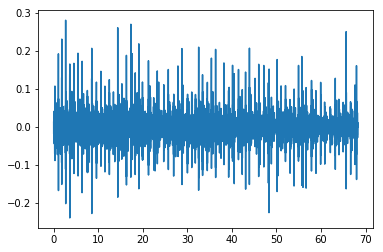

In [230]:
fig, ax = plt.subplots()
ax.plot(time,audio)

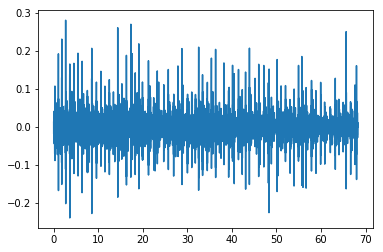

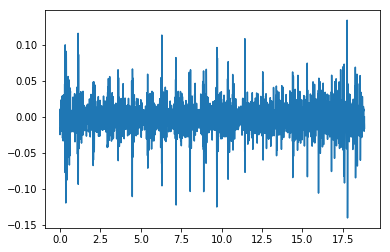

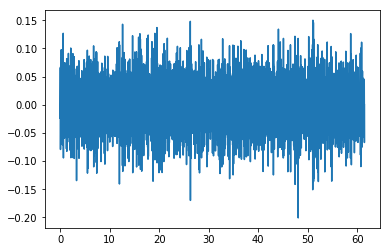

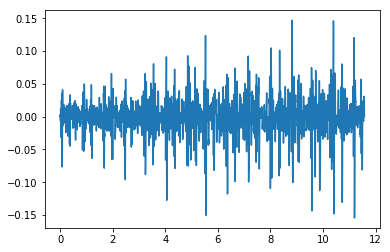

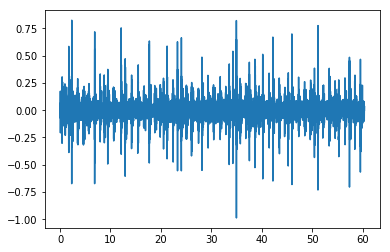

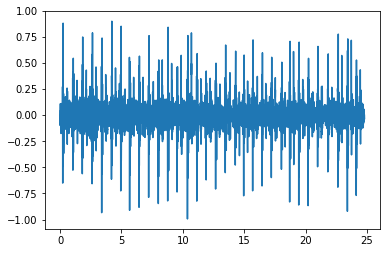

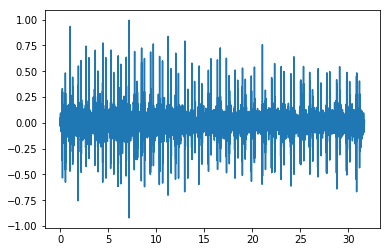

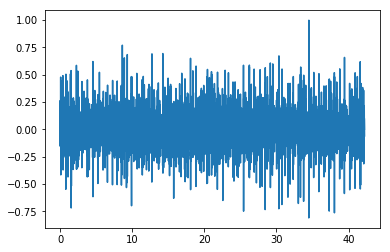

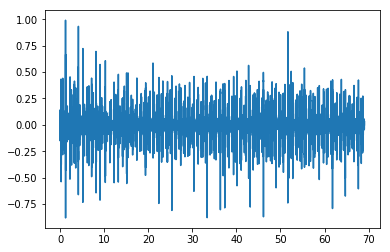

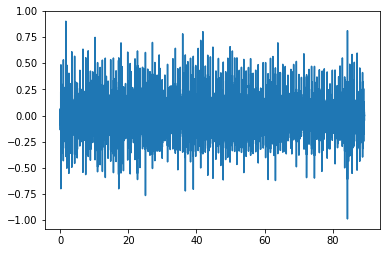

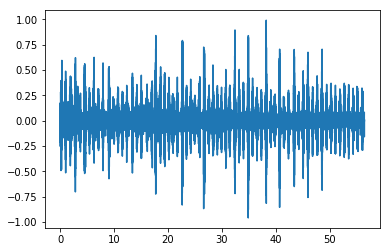

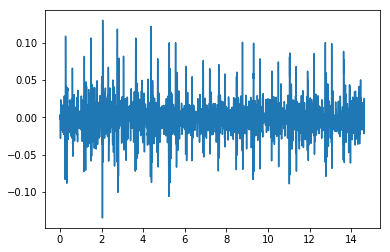

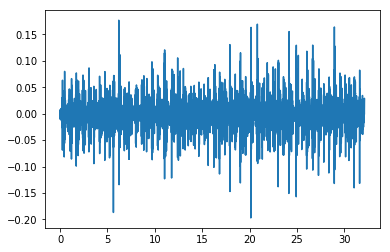

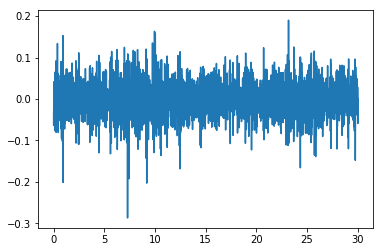

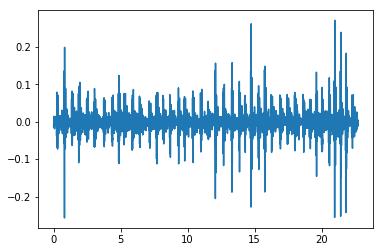

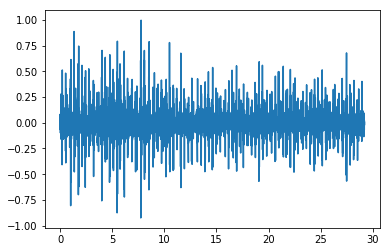

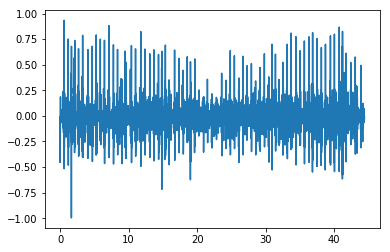

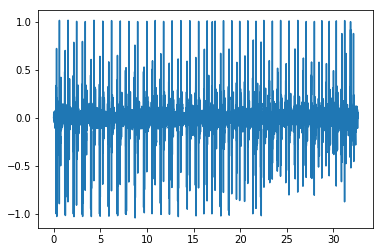

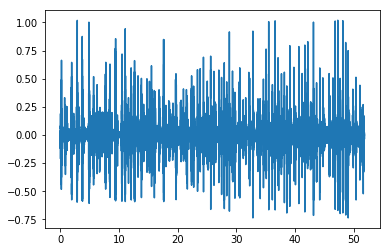

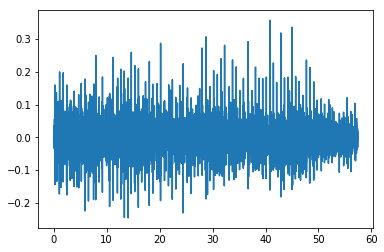

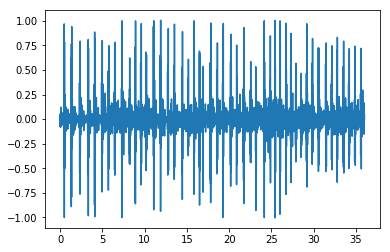

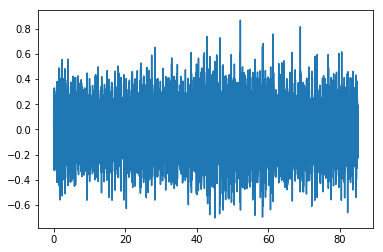

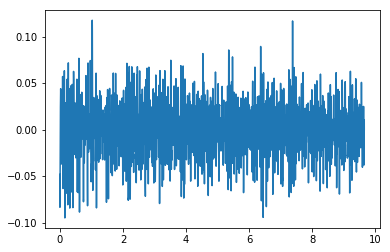

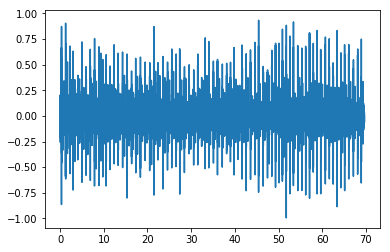

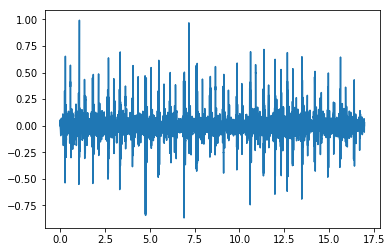

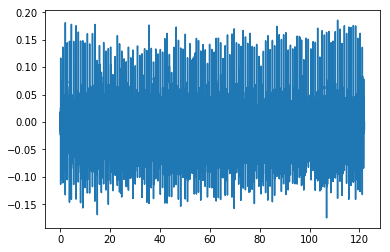

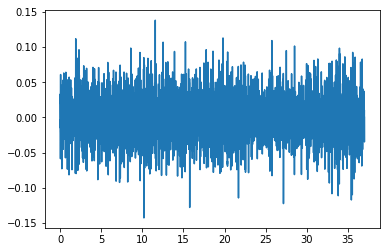

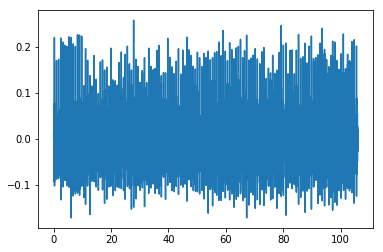

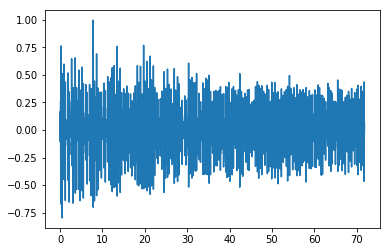

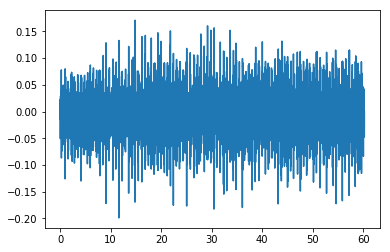

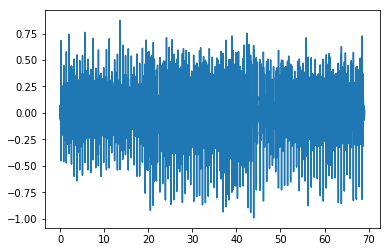

In [231]:
for file in range(0, len(audio_files),1):
    audio, sfreq = librosa.load(audio_files[file])
    fig,ax = plt.subplots()
    time = np.arange(0,len(audio))/sfreq
    ax.plot(time,audio)
    plt.show()

In [232]:
train = pd.concat([training_a, training_b,training_c,training_d,training_e,training_f], axis=0)
train

wavfile  actuals  pred
0     a0001        1   NaN
1     a0002        1   NaN
2     a0003        1   NaN
3     a0004        1   NaN
4     a0005        1   NaN
..      ...      ...   ...
109   f0110       -1   NaN
110   f0111       -1   NaN
111   f0112       -1   NaN
112   f0113       -1   NaN
113   f0114       -1   NaN

[3240 rows x 3 columns]

In [233]:
train["actuals"].value_counts()

-1    2575
 1     665
Name: actuals, dtype: int64

In [234]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

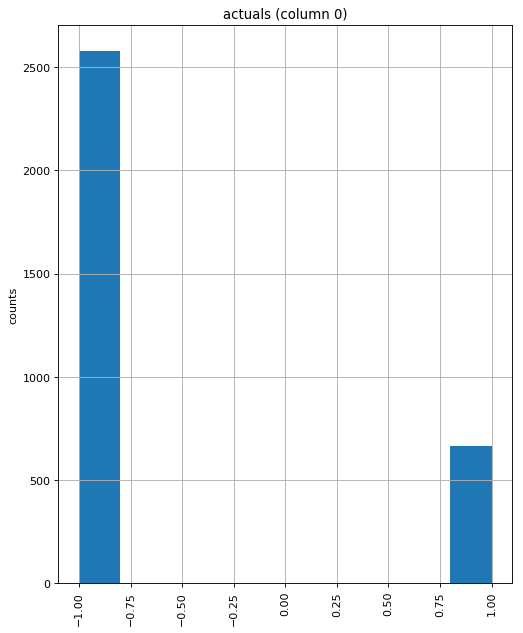

In [235]:
plotPerColumnDistribution(train, 10, 5)

In [236]:
#Helper Function
def get_wave_path(wav_file_name,wav_path):
    if (wav_file_name[0] =='a'):
        wav_path = wav_path + "training-a/" + wav_file_name +".wav"
        #print(wav_path)
    elif (wav_file_name[0] =='b'):
        wav_path = wav_path + "training-b/" + wav_file_name +".wav"
    elif (wav_file_name[0] =='c'):
        wav_path = wav_path + "training-c/" + wav_file_name +".wav"
    elif (wav_file_name[0] =='d'):
        wav_path = wav_path + "training-d/" + wav_file_name +".wav"
    elif (wav_file_name[0] =='e'):
        wav_path = wav_path + "training-e/" + wav_file_name +".wav"
    elif (wav_file_name[0] =='f'):
        wav_path = wav_path + "training-f/" + wav_file_name +".wav"
    return wav_path

In [237]:
from scipy.io import wavfile
normals = train.query('actuals == "1"')['wavfile'].tolist()
print(wav_path)
normal_sound_file = get_wave_path(str(normals[1]),wav_path)
print(normal_sound_file)
Audio(normal_sound_file)


../input/heart-sounds-physionet-challange-2016/training/
../input/heart-sounds-physionet-challange-2016/training/training-a/a0002.wav


In [238]:
normal_wav, sr = load_wave_file(wav_path+'training-a/a0009.wav')
ipd.Audio(wav,rate=sr)

In [239]:
import IPython.display as ipd
#plot a normal wave
normal_wav, sr = load_wave_file(normal_sound_file)
#Abnormals
abnormals = train.query('actuals == "-1"')['wavfile'].tolist()
#print(wav_path)
abnormal_sound_file = get_wave_path(str(abnormals[1]),wav_path)
#plot a normal wave
abnormal_wav, sr = load_wave_file(abnormal_sound_file)

print(abnormal_sound_file)
ipd.Audio(abnormal_wav, rate=sr)

../input/heart-sounds-physionet-challange-2016/training/training-a/a0009.wav


In [199]:
# Plot the normal and Abnormal sound waves side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
axes[0].plot(normal_wav,color="b")
axes[0].set_title('Normal Wave')
axes[1].plot(abnormal_wav,color="r")
axes[1].set_title('Abnormal Wave')